# Лабораторная работа №9
### Тылецкого Павла

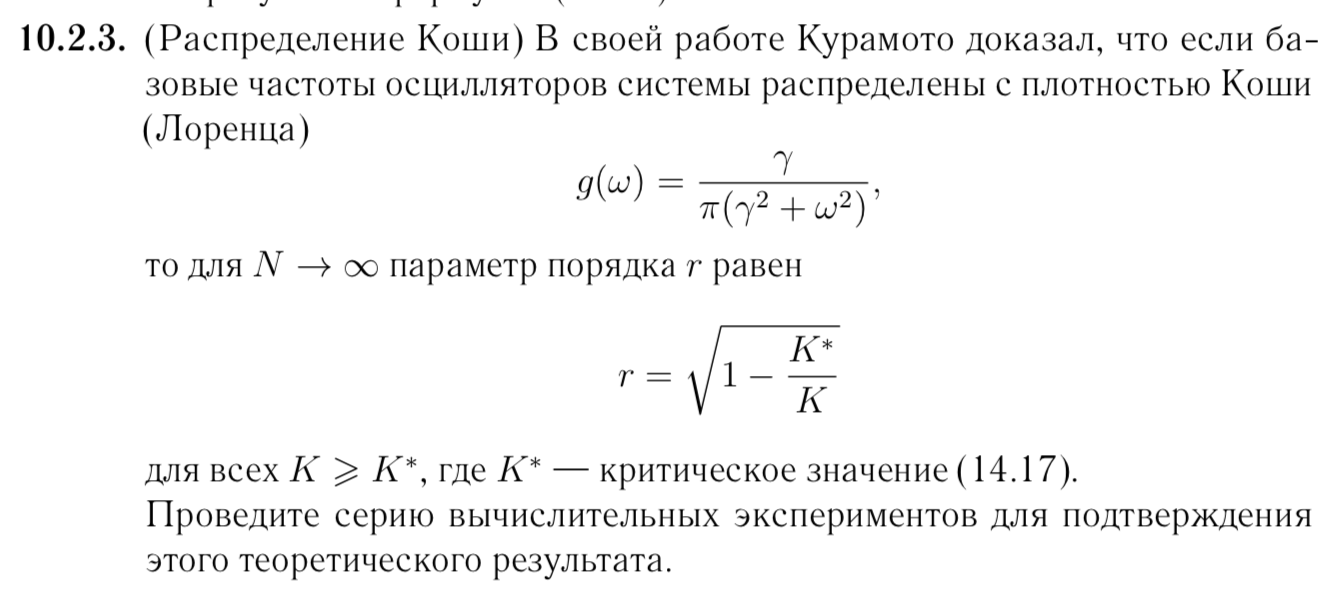

In [11]:
import numpy as np
from scipy.integrate import odeint, ode
from tqdm import tqdm

y0 = 0
t0 = 1000
te = 1100
N = 200
K = 100
dt = 10

def polar_vector_sum_abs(fi1, r1, fi2, r2):
    return fi1 + np.arctan2(r2 * np.sin(fi2 - fi1), r1 + r2 * np.cos(fi2 - fi1)), \
        np.sqrt(r1**2 + r2**2 + 2 * r1 * r2 * np.cos(fi2 - fi1))

def r_val(ts):
    fi_p = ts[0]
    r_p = 1
    for fi in ts[1:]:
        fi_p, r_p = polar_vector_sum_abs(fi_p, r_p, fi, 1)
    return r_p / N

def pend(y, t, w, tethas):
    return w + K / N * sum(np.sin(tethas[i] - y) for i in range(N))

def jac(t, y, w, tethas):
    return - K / N * sum(np.cos(tethas[i] - y) for i in range(N))

def normalize(tethas):
    return [i % 2*np.pi for i in tethas];

w = np.random.standard_cauchy(N)
tethas = np.random.normal(1, 0.3, N)
odes = [ode(pend, jac) for i in range(N)]
ts = [0 for i in range(N)]

xs = np.arange(t0 + dt, te, dt)
data = []

for i in range(N):
        r = odes[i]
        r.set_initial_value(y0, t0).set_f_params(w[i], tethas).set_jac_params(w[i], tethas)
        res = r.integrate(t0)
        ts[i] = res[0]
        
for t in tqdm(xs):
    for i in range(N):
        r = odes[i]
        r.set_initial_value(y0, t0).set_f_params(w[i], tethas).set_jac_params(w[i], tethas)
        res = r.integrate(t)
        ts[i] = res[0]
    tethas = normalize(ts)
    data.append(r_val(tethas))


100%|██████████| 9/9 [07:21<00:00, 49.01s/it]


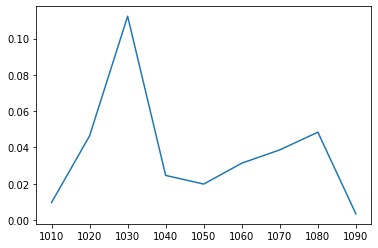

In [15]:
import matplotlib.pyplot as plt

plt.plot(xs, np.array(data))
plt.show()

In [8]:
K_aim = 2
np.sqrt(1 - K_aim / K)

0.9899494936611666

Похоже на то, что было получено скорее противоположное от ожидаемого значения, однако, хорошо, что хотя бы сошлось в более узкую область. Возможно, слишком малые значения времени и N были проверены, так как не представляется возможности представить еще большие N. И, конецно, возможны ошибки в написании исходного кода(но вроде вычищен и часами проверялся)